In [1]:
from IPython.core.display import HTML

def _set_css_style(css_file_path):
   """
   Read the custom CSS file and load it into Jupyter.
   Pass the file path to the CSS file.
   """

   styles = open(css_file_path, "r").read()
   s = '<style>%s</style>' % styles     
   return HTML(s)

_set_css_style('rise.css')

# Iteration and data visualization

<a href="?print-pdf">print view</a><br>
<a href="lecture-04-plot.ipynb">notebook</a>

## Conditionals and control flow

**`if` statements**

 * An `if` statement conditionally executes a block of code
  * The condition is some Boolean value
  * A block of code is delineated by consistent indentation.
  * Blank lines and comments will not end a block
  * *Whitespace is significant - do not mix tabs and spaces*
 * In an `if..elif..else` statement, only one block of code will be executed 

In [2]:
if False:
    print(1)
elif True:
    print(2)
else:
    print(3)

2


## What is `val`?

In [3]:
val = 0
if val >= 0:
    val += 1
elif val < 1:
    val += 2
elif True:
    val += 3
else:
    val += 5
    
    val += 7

val

1

## `pass`

`pass` does nothing

In [4]:
if True:
    pass
else:
    print("I will never print")

## Logical operators

 * `and`, `or`, and `not`
 * `not` has higher precedence than `and` which has higher precedence than `or`
 * all three have lower precedence than comparison operators
 * but use parentheses to avoid confusion

## Which is equivalent to `not (x and y)`?

`not x and not y`  
`not x and y`  
`x or y`  
`not x or not y`  

## A more complex example

In [7]:
x = 3; y = 4; z = 5
(x != 3 or not y < 0) and (z < 10 or not y == 0)

True

## Membership testing

`in` and `not in` can be used to see if an object is in a collection

In [8]:
l = [1, 2, 3]

In [9]:
1 in l

True

In [10]:
345 in l

False

In [11]:
"1" not in l

True

In [12]:
"good" in "goodness"

True

## True or false?

In [13]:
'cat' in 'catalog'

True

In [14]:
'cat' in ['catalog', 'catastrophe']

False

## Loops

In [15]:
i = 0
while i < 3:  # as long as this condition is true...
    print(i)  # ...execute this block of code
    i += 1   

0
1
2


In [16]:
letters = ['a','b','c','d','e','f','g']
for i in letters: # for every item in this collection...
    print(i)      # ...execute this block of code with i set to the object

a
b
c
d
e
f
g


## `range`

The preferred method of looping is to use a `for` loop.  There are a number of builtin functions to help create collections to iterate over.

In [17]:
list(range(3))

[0, 1, 2]

In [18]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [19]:
list(range(1,10,3))

[1, 4, 7]

## What is `val`?

In [20]:
val = 0
for i in range(10):
    val += i

val

45

## Iterable

`for` will loop over any _iterable_ object

In addition to collections, this includes any object that can provide items one at a time (e.g., files)

In [21]:
f = open("../files/brca1.fasta")
count = 0
for line in f.readlines():
    count += len(line)
count

6258

In [22]:
f = open("../files/brca1.fasta")
count = 0
for line in f:  # can iterate through file object directly!
    count += len(line)
count

6258

## `break` and `continue`

`break` will exit out of the entire loop while `continue` will skip to the next iteration

In [23]:
i = 0
while True:
    i += 1
    if i < 6:
        continue
    print(i)
    if i > 4:
        break

6


## What is the value of `x`?

In [26]:
x = 0
while x < 100:
    if x < 50:
        pass
    elif x == 5:
        break
    x += 1

x

100

## Slicing

What if you don't want to iterate over the full list?

In [27]:
s = "Hello"
s[0:2]

'He'

In [28]:
s[2:] # empty indices indicate remainder of string/list

'llo'

In [29]:
s[:-2] # negative indices count from the back

'Hel'

In [30]:
s2 = "Hello, world"
s2[:-2]

'Hello, wor'

## Slicing a `list`

In [32]:
l = ["cat", "dog", "fish", "mouse"]
l[2:3]

['fish']

## `matplotlib`

**Makes easy things easy and hard things possible**

`plt` has hundreds of functions for creating and manipulating plots

`plt.plot` creates line/point graphs

You can specify an arbitrary number of x, y, format arguments

In [33]:
import matplotlib.pyplot as plt
# next is a python notebook command to embed plot output in the notebook
# this may or may not be necessary depending on versions
%matplotlib inline 

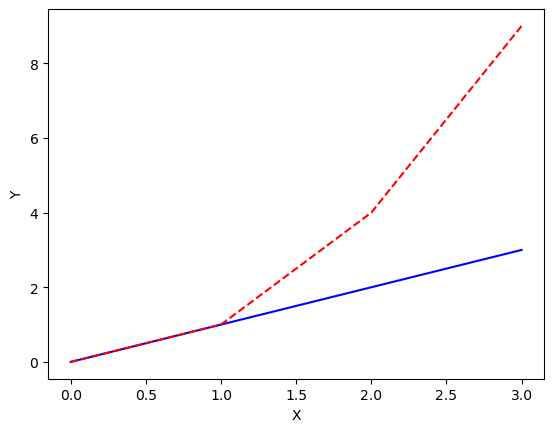

In [34]:
plt.plot([0,1,2,3], [0,1,2,3], '-b', [0,1,2,3], [0,1,4,9], '--r')
plt.ylabel('Y')
plt.xlabel('X')
plt.show() # not actually necessary in notebook

## `matplotlib` can overlay multiple plots on the same figure

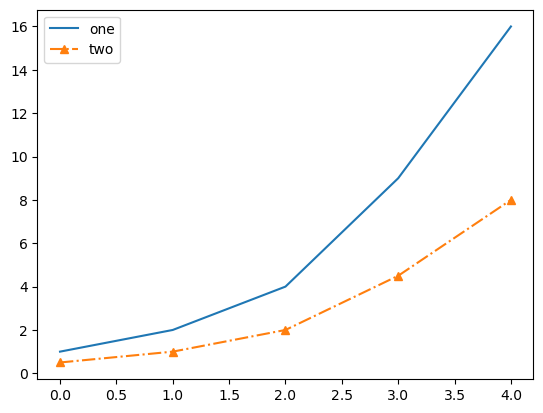

In [35]:
plt.plot([1,2,4,9,16], label='one') # if only one data set is provide, assume uniform x
plt.plot([0.5,1,2,4.5,8], '^-.', label='two') # keep adding to current graph until show is called
plt.legend() # uses labels
plt.show()

In [36]:
plt.show() # this doesn't show anything since we haven't created another plot
plt.close() # another way to finish with a plot

If you use the `%matplotlib` command in ipython, the plot will be updated with every command (can skip `show`)

## Many options for formatting plots (marker type, color, size, ...)

Can also specify colors with hexadecimal or color-generating functions

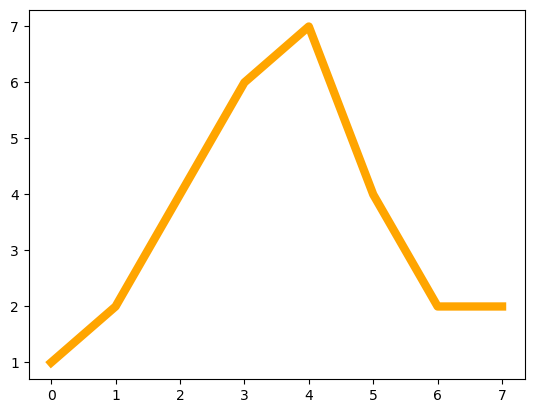

In [37]:
plt.plot([1,2,4,6,7,4,2,2], 'orange', linewidth=6)
plt.show()

# Plotting expression data

In [38]:
f = open('../files/Spellman.csv')
header = f.readline().rstrip().split(',') # rstrip removes newline
data = []
for line in f:
    data.append(line.rstrip().split(','))
len(data)

4381

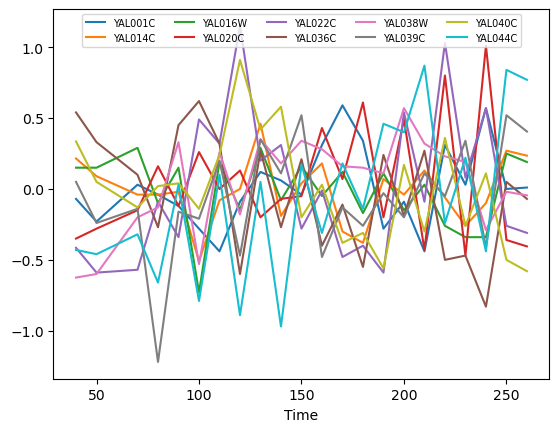

In [39]:
for row in data[:10]: # first 10 only
    values = list(map(float, row[1:]))
    times = list(map(int, header[1:]))
    plt.plot(times,values,label=row[0])
plt.legend(loc='upper center', ncol=5, prop={'size':7})
plt.xlabel("Time");

## Bar charts

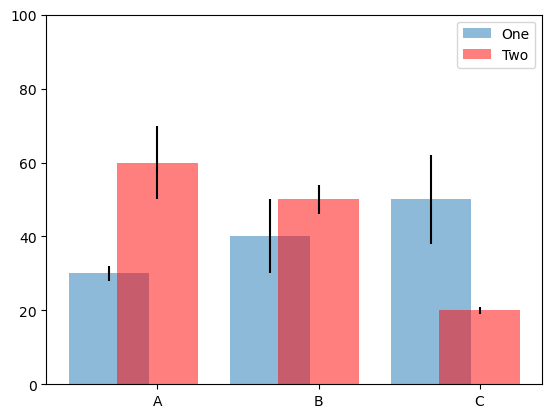

In [40]:
plt.bar([1.1,2.1,3.1], [30,40,50], 0.5, yerr=[2,10,12], ecolor="black", alpha=0.5, label="One")
plt.bar([1.4,2.4,3.4], [60,50,20], 0.5, color='r', yerr=[10,4,1], ecolor="black", alpha=0.5, label="Two")
plt.xticks([1.4,2.4,3.4], ['A','B','C'])
plt.ylim([0,100])
plt.legend();

## Histograms

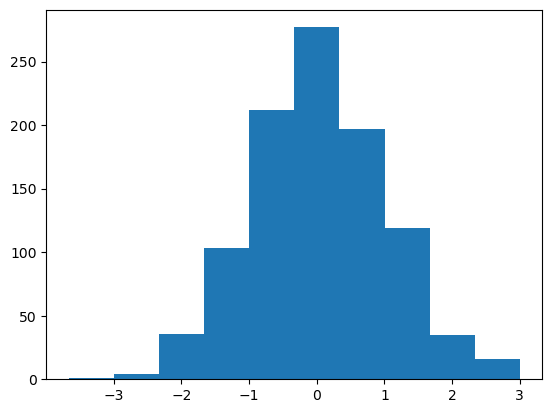

In [41]:
import random
rdata = []
for i in range(1000):
    rdata.append(random.normalvariate(0,1))
    
plt.hist(rdata,10);

## Combining chart types

Just accumulate plots

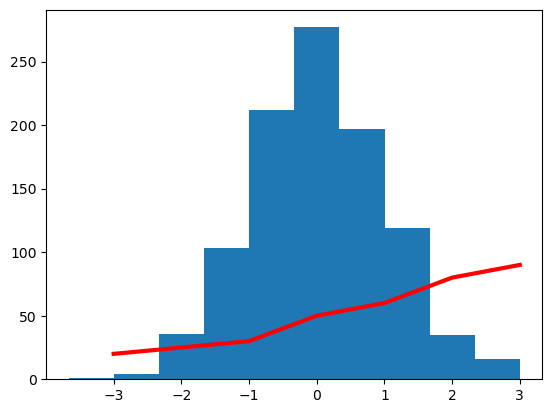

In [42]:
plt.hist(rdata,10)
plt.plot([-3,-1,0,1,2,3], [20,30,50,60,80,90], '-r', linewidth=3)
plt.show()

## Terminology

**Figure** -- the full canvas you are creating your plot(s) on.

**Axes** -- a single plot

<img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png">

## Multiple plots on a figure

[subplots(nrows,ncols)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)

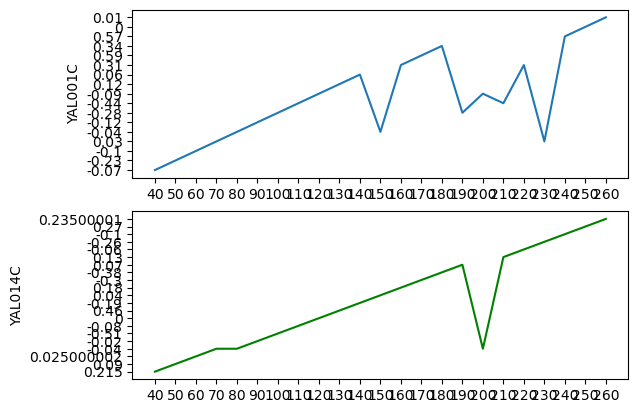

In [43]:
fig, axes = plt.subplots(2,1)
plt.sca(axes[0]) #set current axis to first
plt.plot(header[1:],data[0][1:])
plt.ylabel(data[0][0])

plt.sca(axes[1])
plt.plot(header[1:],data[1][1:],'g')
plt.ylabel(data[1][0])
plt.show()

See also <a href="http://matplotlib.org/users/gridspec.html">GridSpec</a>

## Multiple plots on a figure

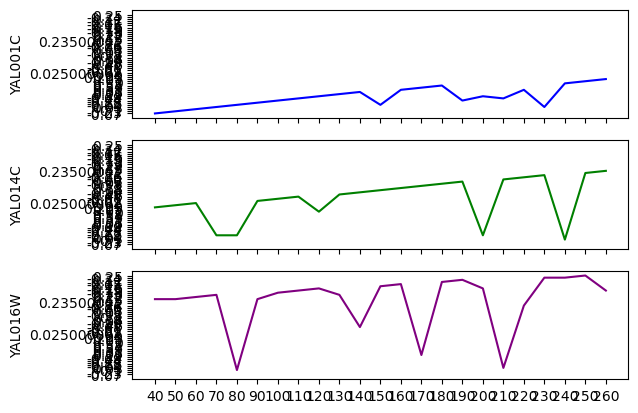

In [44]:
numgenes = 3
fig, axes = plt.subplots(numgenes,1,sharex=True,sharey=True)
colors = ['b','g','purple']
for i in range(numgenes):
    #most plot methods have equivalents on axes objects
    axes[i].plot(header[1:],data[i][1:],color=colors[i])
    axes[i].set_ylabel(data[i][0])

# Saving figures

Instead of `plt.show` use `plt.savefig`

`bbox_inches='tight'` tells matplotlib to try harder to fit everything without extra white space

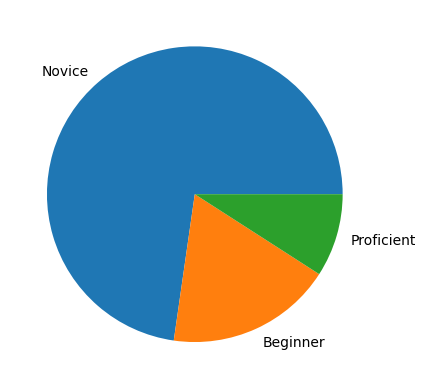

In [45]:
plt.axes(aspect=1)
plt.pie([8,2,1],labels=["Novice","Beginner","Proficient"])
plt.savefig("pie.png", bbox_inches='tight')

In [46]:
ls *png

pie.png


Other formats: pdf, svg, eps...

## Other chart types

<a href="http://matplotlib.org/gallery.html">Gallery</a>

## Seaborn

Making (some) hard things easy

[Gallery](https://seaborn.pydata.org/examples/index.html)

## Project

https://MSCBIO2025-2024.github.io/files/Spellman.csv

* plot a gene
* plot the histogram of initial expression levels
* plot the histogram of final expression levels
* plot the above histograms on the same plot with transparent fill
* plot the above with identical bin sizes for both histograms
* plot the above histograms on different subplots, vertically stacked